In [41]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [64]:
#df_ex = pd.read_csv('./datos_limpios/cln_extrusion.csv', parse_dates=['fecha_chida'])
df_ex = pd.read_csv('./datos_limpios/cln_sellado.csv', parse_dates=['FECHA'])
df_ex.head()

,Unnamed: 0,FECHA,SEMANA,TURNO,HORA DE INICIO,RESPONSABLE,OPERADORES,NUMERO DE PEDIDO,SELL.,NOMBRE DEL PEDIDO,...,BOLSA DE 2A,ORIGEN,CUARENTENA,BASURA,MUESTRAS,HORA FINAL,HORAS DE TRABAJO,year,month,day
0,0,2019-01-02,1,2.0,5:00:00 p. m.,RESPONSABLE1,OPERADORES1,SAP-1615,SEL003,BELLE-001,...,0.54,NaN,NaN,0.12,0.05,21:40:00,4.70,2019,1,2
1,1,2019-01-02,1,2.0,5:00:00 p. m.,RESPONSABLE1,OPERADORES2,SAP-1604,SEL011,SAPI-001,...,0.00,NaN,NaN,0.30,0.1,21:45:00,4.75,2019,1,2
2,2,2019-01-02,1,3.0,10:00:00 p. m.,RESPONSABLE2,OPERADORES3,SAP-1615,SEL003,BELLE-001,...,1.10,IMP. Y SELL,NaN,0.00,0.06,5:00:00,7.00,2019,1,2
3,3,2019-01-02,1,3.0,10:00:00 p. m.,RESPONSABLE2,OPERADORES4,SAP-1604,SEL011,SAPI-001,...,0.00,NaN,NaN,0.10,0.14,3:00:00,5.00,2019,1,2
4,4,2019-01-03,1,1.0,7:00:00 a. m.,RESPONSABLE3,OPERADORES5,SAP-1606,SEL011,YELI-002,...,0.00,NaN,NaN,0.00,0.13,9:00:00,2.00,2019,1,3


## Pregunta 1

In [65]:
#df_ex['weekday'] = df_ex['fecha_chida'].dt.weekday.apply(lambda x: ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'][x])
df_ex['weekday'] = df_ex['FECHA'].dt.weekday.apply(lambda x: ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'][x])
df_ex['weekday'].unique()

array(['Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Lunes', 'Martes',
       'Domingo'], dtype=object)

In [66]:
df_ex[df_ex['TURNO'].isnull()]

,Unnamed: 0,FECHA,SEMANA,TURNO,HORA DE INICIO,RESPONSABLE,OPERADORES,NUMERO DE PEDIDO,SELL.,NOMBRE DEL PEDIDO,...,ORIGEN,CUARENTENA,BASURA,MUESTRAS,HORA FINAL,HORAS DE TRABAJO,year,month,day,weekday
945,945,2019-03-26,13,NaN,NaN,RESPONSABLE4,OPERADORES25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,2019,3,26,Martes


In [67]:
df_ex['TURNO'] = df_ex['TURNO'].interpolate(method='pad')
df_ex[df_ex['TURNO'].isnull()]

,Unnamed: 0,FECHA,SEMANA,TURNO,HORA DE INICIO,RESPONSABLE,OPERADORES,NUMERO DE PEDIDO,SELL.,NOMBRE DEL PEDIDO,...,ORIGEN,CUARENTENA,BASURA,MUESTRAS,HORA FINAL,HORAS DE TRABAJO,year,month,day,weekday


In [69]:
#df_ex_grouped = df_ex[['weekday', 'TURNO', 'fecha_chida']].groupby(['weekday', 'TURNO']).count()
df_ex_grouped = df_ex[['weekday', 'TURNO', 'FECHA']].groupby(['weekday', 'TURNO']).count()

df_ex_grouped = df_ex_grouped.rename({'FECHA':'freq'}, axis=1)

df_ex_grouped

freq
weekday   TURNO      
Domingo   1.0       5
Jueves    1.0     238
          2.0     238
          3.0     195
Lunes     1.0     194
          2.0     197
          3.0     186
Martes    1.0     234
          2.0     225
          3.0     216
Miercoles 1.0     230
          2.0     210
          3.0     202
Sabado    1.0     193
          2.0     185
          3.0     173
Viernes   1.0     233
          2.0     203
          3.0     211

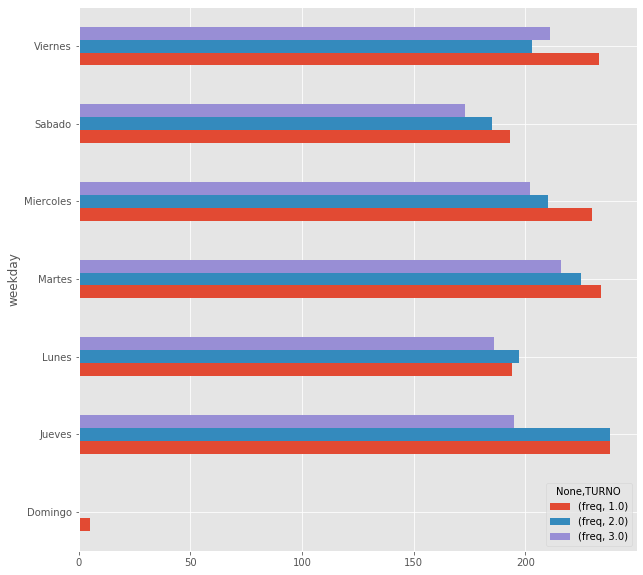

In [70]:
df_ex_grouped.unstack().plot(kind='barh', figsize=(10,10))

## Pregunta 2

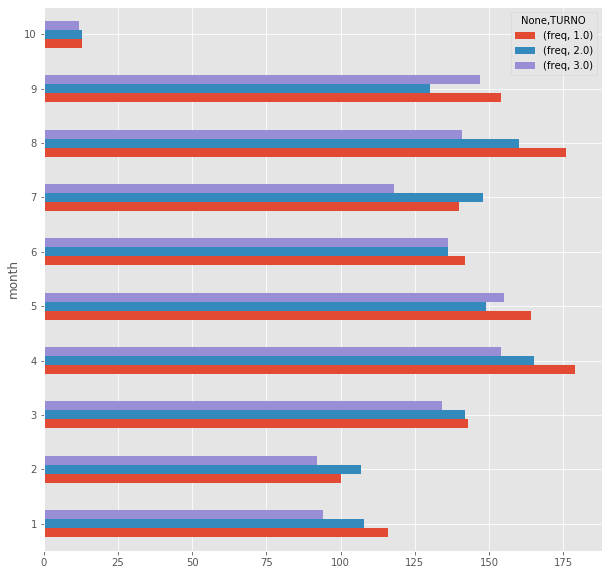

In [71]:
#df_ex_grouped = df_ex[['month', 'TURNO', 'fecha_chida']].groupby(['month', 'TURNO']).count()
df_ex_grouped = df_ex[['month', 'TURNO', 'FECHA']].groupby(['month', 'TURNO']).count()

df_ex_grouped = df_ex_grouped.rename({'FECHA':'freq'}, axis=1)

df_ex_grouped.unstack().plot(kind='barh', figsize=(10,10))

In [76]:
df_ex = pd.read_csv('./datos_limpios/cln_extrusion.csv', parse_dates=['fecha_chida'])
df_ex['weekday'] = df_ex['fecha_chida'].dt.weekday.apply(lambda x: ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'][x])

df_all = df_ex[['weekday', 'TURNO', 'fecha_chida']]
df_all = df_all.rename({'fecha_chida':'freq'}, axis=1)

df_ex = pd.read_csv('./datos_limpios/cln_impresion.csv', parse_dates=['FECHA'])
df_ex['weekday'] = df_ex['FECHA'].dt.weekday.apply(lambda x: ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'][x])

df_ex = df_ex[['weekday', 'TURNO', 'FECHA']]
df_ex = df_ex.rename({'FECHA':'freq'}, axis=1)

df_all = pd.concat([df_all, df_ex])

df_ex = pd.read_csv('./datos_limpios/cln_sellado.csv', parse_dates=['FECHA'])
df_ex['weekday'] = df_ex['FECHA'].dt.weekday.apply(lambda x: ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'][x])

df_ex = df_ex[['weekday', 'TURNO', 'FECHA']]
df_ex = df_ex.rename({'FECHA':'freq'}, axis=1)

df_all = pd.concat([df_all, df_ex])

df_all = df_all.groupby(['weekday', 'TURNO']).count()

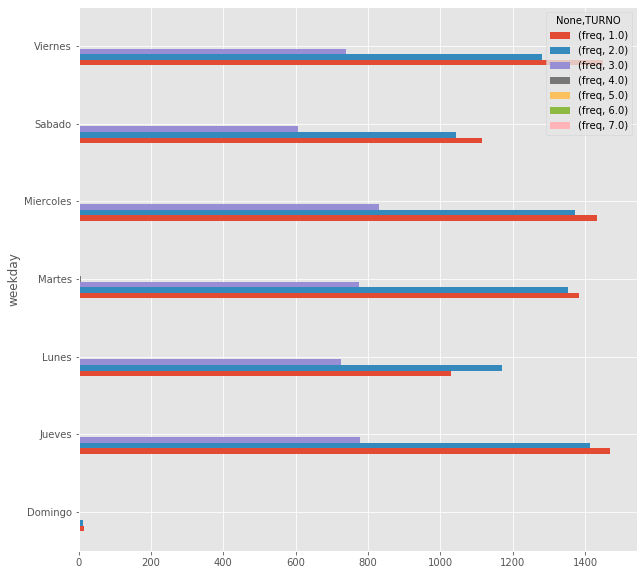

In [77]:
df_all.unstack().plot(kind='barh', figsize=(10,10))

In [78]:
df_ex = pd.read_csv('./datos_limpios/cln_extrusion.csv', parse_dates=['fecha_chida'])

df_all = df_ex[['month', 'TURNO', 'fecha_chida']]
df_all = df_all.rename({'fecha_chida':'freq'}, axis=1)

df_ex = pd.read_csv('./datos_limpios/cln_impresion.csv', parse_dates=['FECHA'])

df_ex = df_ex[['month', 'TURNO', 'FECHA']]
df_ex = df_ex.rename({'FECHA':'freq'}, axis=1)

df_all = pd.concat([df_all, df_ex])

df_ex = pd.read_csv('./datos_limpios/cln_sellado.csv', parse_dates=['FECHA'])

df_ex = df_ex[['month', 'TURNO', 'FECHA']]
df_ex = df_ex.rename({'FECHA':'freq'}, axis=1)

df_all = pd.concat([df_all, df_ex])

df_all = df_all.groupby(['month', 'TURNO']).count()

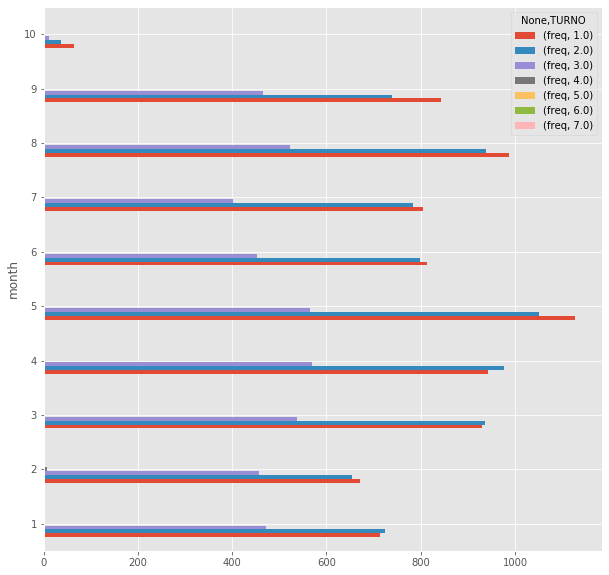

In [79]:
df_all.unstack().plot(kind='barh', figsize=(10,10))